# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')
table = soup.find(class_='table')

In [5]:
# Extract all rows of data
table_rows = table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data_list = []


# Loop through the scraped data to create a dictionary of rows
for row in table_rows[1:]:  # Skip the header row
    columns = row.find_all('td')
    row_data = [column.text.strip() for column in columns]
    data_list.append(row_data)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [8]:
# Confim DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,13,2012-08-17,11,156,6,-76.0,740.0
1,24,2012-08-18,12,156,6,-76.0,741.0
2,35,2012-08-19,13,157,6,-74.0,732.0
3,46,2012-08-20,14,157,6,-74.0,740.0
4,57,2012-08-21,15,158,6,-78.0,740.0
...,...,...,...,...,...,...,...
1861,1889,2018-02-23,1973,133,5,-78.0,730.0
1862,1892,2018-02-24,1974,134,5,-77.0,729.0
1863,1894,2018-02-25,1975,134,5,-76.0,729.0
1864,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1866 non-null   object
 1   terrestrial_date  1866 non-null   object
 2   sol               1866 non-null   object
 3   ls                1866 non-null   object
 4   month             1866 non-null   object
 5   min_temp          1866 non-null   object
 6   pressure          1866 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1866 non-null   object        
 1   terrestrial_date  1866 non-null   datetime64[ns]
 2   sol               1866 non-null   int32         
 3   ls                1866 non-null   int32         
 4   month             1866 non-null   int32         
 5   min_temp          1866 non-null   float64       
 6   pressure          1866 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
total_months = df["month"].max()
print(f'There are {total_months} months on Mars.)

12


In [21]:
# 2. How many Martian days' worth of data are there?
total_days = df["sol"].count()
print(f'There are {total_days} Martian days worth of data')

1866


In [14]:
# 3. What is the average low temperature by month?
average_low = df.groupby("month")["min_temp"].mean()
print(average_low)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.301370
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


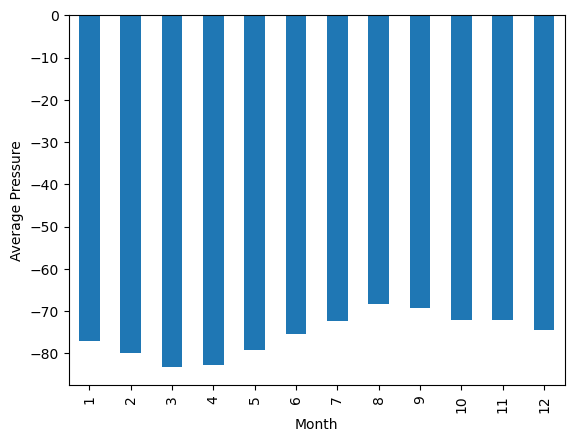

In [22]:
# Plot the average temperature by month
plt.figure()
average_low.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()

In [23]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = average_low.idxmin()
warmest_month = average_low.idxmax()
print(f"The Coldest Month: {coldest_month}")
print(f"The Warmest Month: {warmest_month}")


The Coldest Month: 3
The Warmest Month: 8


In [24]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.095890
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



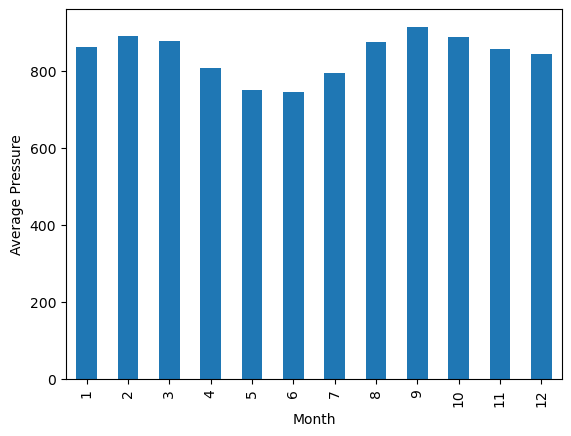

In [26]:
# Plot the average pressure by month
plt.figure()
avg_pressure.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

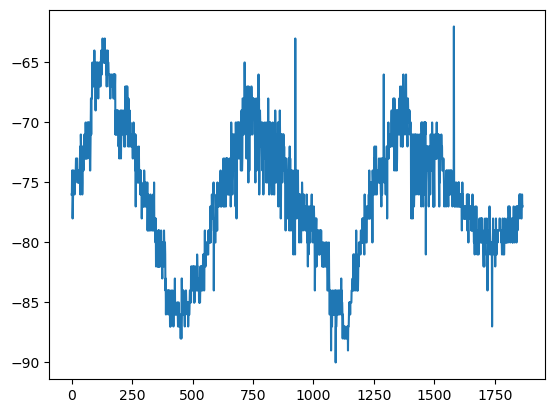

In [27]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df["min_temp"])

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
df.to_csv('results.csv', index=False)

In [29]:
browser.quit()